<a href="https://colab.research.google.com/github/mirceavaman/computer_vision2021/blob/main/CV_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 1
Mircea Vaman


Big Data, $2^{nd}$ year

Write a Python function similar to the function `gaussian_fourier_filter` provided
during lab 2 tutorial at point 20 which will apply homomorphic filtering in frequency domain. The
function will receive as parameters: the cut-off frequency $D_{0}$, the high frequency gain $\gamma_{H}$, the low
frequency gain $\gamma_{L}$, and the input image.

Loading the desired packages

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Loading image

In [7]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

upload_files()

Saving uvt.png to uvt.png


['uvt.png']

Implementing the `homophobic_filter` function



In [2]:
def homomorphic_filter(img, D0, gammaL, gammaH):
    img = np.float32(img)
    img = img / 255
    rows, cols, dim = img.shape

    imgYCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(imgYCrCb)

    y_log = np.log(y + 0.01)
    y_fft = np.fft.fft2(y_log)
    y_fft_shift = np.fft.fftshift(y_fft)

    DX = cols / D0
    G = np.ones((rows, cols))
    for i in range(rows):
        for j in range(cols):
            G[i][j] = ((gammaH - gammaL) * (1 - np.exp(-((i - rows / 2) ** 2 + (j - cols / 2) ** 2) / (2 * DX ** 2)))) \
                      + gammaL

    result_filter = G * y_fft_shift
    result_partial = np.real(np.fft.ifft2(np.fft.ifftshift(result_filter)))
    result = np.exp(result_partial)

    return result

Testing the implementation

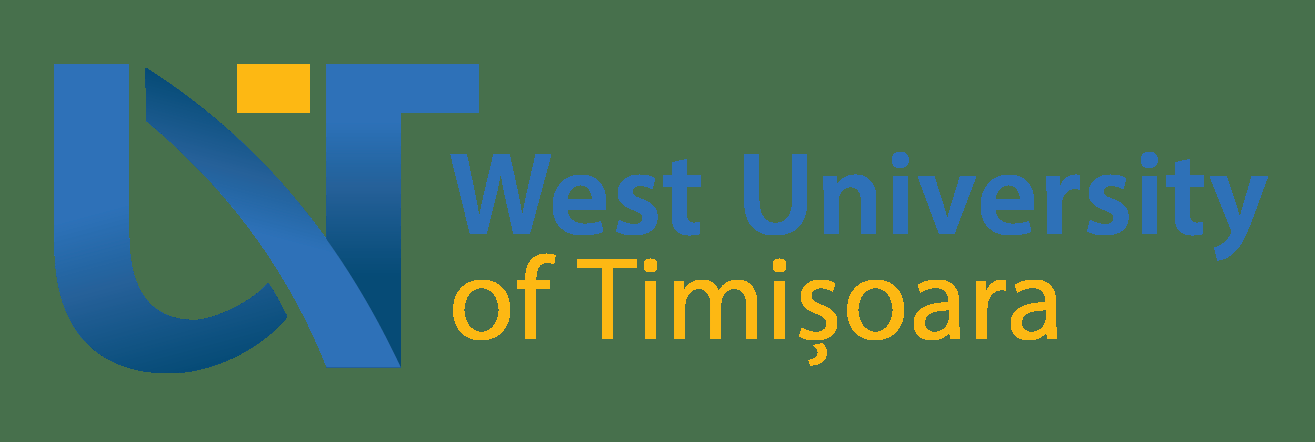

In [19]:
if __name__ == "__main__":
  img = cv2.imread('uvt.png')
  cv2_imshow(img)

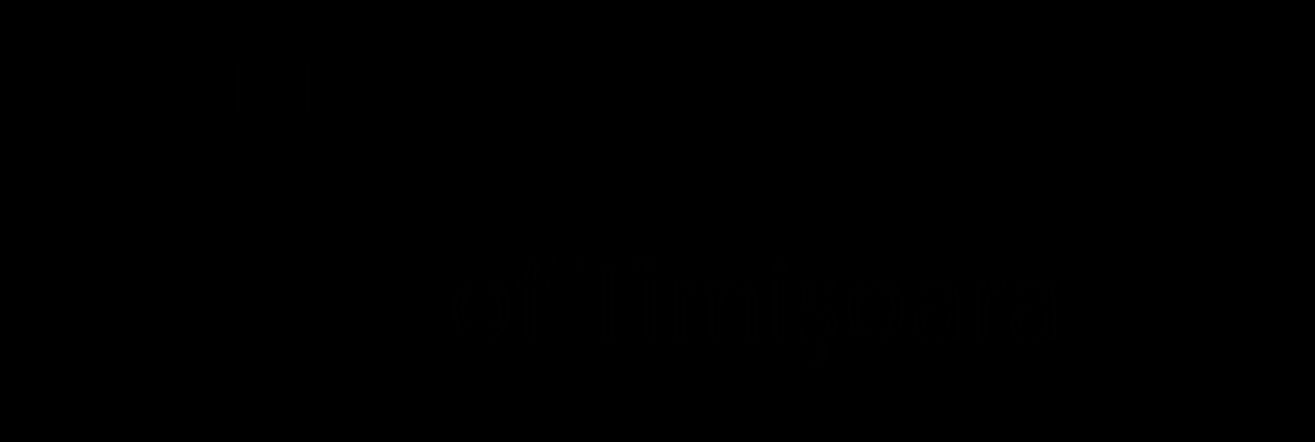

In [20]:
  img_filtered = homomorphic_filter(img, 20, 0.5, 2)
  cv2_imshow(img_filtered)